In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from mpl_toolkits.mplot3d import Axes3D
from sympy import *

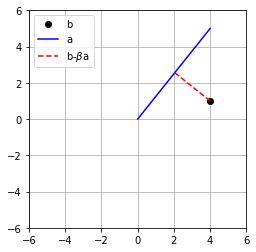

In [18]:
# point b
b = np.array([4,1])

# line a
a = np.array([4,5])

# betta
beta = (a.T@b)/(a.T@a)

# draw!
plt.plot(b[0],b[1],'ko',label='b')
plt.plot([0, a[0]],[0, a[1]],'b',label='a')

# now plot projection line
plt.plot([b[0], beta*a[0]],[b[1], beta*a[1]],'r--',label=r'b-$\beta$a')
plt.axis('square')
plt.grid()
plt.legend()
plt.axis((-6, 6, -6, 6))

plt.show()

In [19]:
A_B = beta*a

In [20]:
C = A_B-b
D = C@A_B

In [21]:
D

0.0


---
# Projections in R^N
---


In [23]:
## the goal here is to solve Ax=b for x

# sizes
m = 16
n = 10

# vector b
b = np.random.randn(m,1)

# matrix A
A = np.random.randn(m,n)

# solution using explicit inverse
x1 = np.linalg.inv(A.T@A) @ (A.T@b)

# python solution (better method)
x2 = np.linalg.solve(A.T@A,A.T@b)

# show that the results are the same
print(np.round(x1.T,3))
print(np.round(x2.T,3))

[[ 0.85   0.383 -0.204  0.33  -0.378  0.133  0.436 -0.528 -0.532  0.185]]
[[ 0.85   0.383 -0.204  0.33  -0.378  0.133  0.436 -0.528 -0.532  0.185]]


In [5]:
## geometric perspective in R^3

# matrix sizes
m = 3
n = 2

# vector b
b = np.random.randn(m,1)

# matrix A
A = np.random.randn(m,n)


# solution
x = np.linalg.solve(A.T@A,A.T@b)
Ax = A@x

print(b.T)
print(Ax.T)

[[ 1.49971118 -1.10035968 -0.73211891]]
[[ 1.7352508  -0.62028537 -0.21419671]]


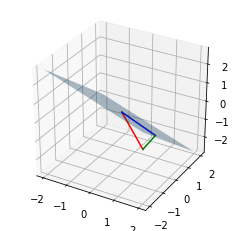

In [6]:
## plot
fig = plt.figure(figsize=plt.figaspect(1))
ax = fig.gca(projection='3d')

# plot the vectors
ax.plot([0, b[0]],[0, b[1]],[0, b[2]],'r')
ax.plot([0, Ax[0]],[0, Ax[1]],[0, Ax[2]],'b')

# plot the projection line
ax.plot( [Ax[0][0], b[0]],
         [Ax[1][0], b[1]],
         [Ax[2][0], b[2]], 'g')

# now draw plane
xx, yy = np.meshgrid(np.linspace(-2,2), np.linspace(-2,2))
cp = np.cross(A[:,0],A[:,1])
z1 = (-cp[0]*xx - cp[1]*yy)*1./cp[2]
ax.plot_surface(xx,yy,z1,alpha=.4)

plt.show()

---
# Decompose vector to orthgonal components
---

In [65]:
# Vector w, to be decomposed
w = np.array([2,3])

# vector v the reference
v = np.array([-3,-1])

#compute w-parallel
w_p = (w.T@v)/(v.T@v)*v
print(w_p)

#compute w-orthogonal
w_o = w - w_p
print(w_o)

#confirm results
print(f'Dot product: {w_o@w_p}')

print(f'Sum {(w_o+w_p)-w}')




[2.7 0.9]
[-0.7  2.1]
Dot product: -4.440892098500626e-16
Sum [0. 0.]


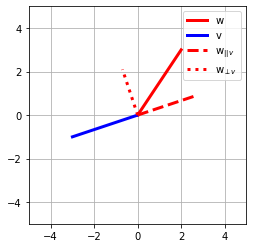

In [66]:
# plot all 4

plt.plot([0,w[0]],[0,w[1]], 'r',linewidth = 3)
plt.plot([0,v[0]],[0,v[1]], 'b',linewidth = 3)
plt.plot([0,w_p[0]],[0,w_p[1]],'r--', linewidth=3)
plt.plot([0,w_o[0]],[0,w_o[1]],'r:', linewidth=3)

plt.legend(['w','v','w$_{||v}$','w$_{\perp v}$'])
plt.axis('square')
plt.grid()
plt.axis([-5,5,-5,5])
plt.show()

Solve equation For example we have following eq.

w1 + w2 = 1

w1 +2w2 = 2

w1 + w2 = 12

Write it in matrix view

In [8]:

# vector b
b = np.array([[1],[2],[12]])

# matrix A
A = np.array([[1,1],[1,2],[1,1]])


# find vector Ax (projection of vector b)
x = np.linalg.solve(A.T@A,A.T@b)
Ax = A@x

print(b.T)
print(Ax.T)
# Magnitude of vector projected vector Ax
print(np.linalg.norm(Ax))

[[ 1  2 12]]
[[6.5 2.  6.5]]
9.40744386111339


In [10]:
x

array([[11. ],
       [-4.5]])

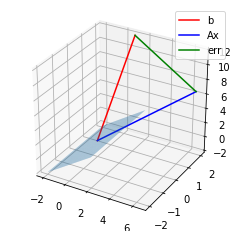

In [9]:
## plot
fig = plt.figure(figsize=plt.figaspect(1))
ax = fig.gca(projection='3d')

# plot the vectors
ax.plot([0, b[0]],[0, b[1]],[0, b[2]],'r')
ax.plot([0, Ax[0]],[0, Ax[1]],[0, Ax[2]],'b')

# plot the projection line
ax.plot( [Ax[0][0], b[0]],
         [Ax[1][0], b[1]],
         [Ax[2][0], b[2]], 'g')

# now draw plane
xx, yy = np.meshgrid(np.linspace(-2,2), np.linspace(-2,2))
cp = np.cross(A[:,0],A[:,1])
z1 = (-cp[0]*xx - cp[1]*yy)*1./cp[2]
ax.plot_surface(xx,yy,z1,alpha=.4)
plt.legend(['b','Ax','err'])

plt.show()

In [90]:
# coordinates of vector orthogonal to Ax vector
err = b-Ax
# length orthogonal to Ax vector
np.linalg.norm(err)

1.3524473830987411

In [85]:
# verify ortho
Ax.T@err

array([[0.]])

In [91]:
print(err)

[[ 0.10759494]
 [-0.64556962]
 [ 1.1835443 ]]


In [87]:
print(Ax)

[[6.5]
 [1. ]
 [6.5]]


Then, our system has a next view

w1+w2 = 6.5

w1+2w2 = 2

w1+w2 = 6.5

Use reduce echelone form to solve tis equation

In [94]:
# make some random matrices (using sympy package)
A = Matrix(np.array([[1,1,6.5],[1,2,1]]) )

# compute RREF
rrefA = A.rref()

# print out the matrix and its rref
print(np.array(rrefA[0]))
print(' ')

[[1 0 12.0000000000000]
 [0 1 -5.50000000000000]]
 


the w1 = 12, w2 = -5

---
# QR decomposition
---

In [97]:
# example from the slides

A = [ [1,0],
      [1,0],
      [0,1] ]

# full QR decomposition

Q,R = np.linalg.qr(A,'complete')
print (Q)
print ()

# print economy QR
Q,R = np.linalg.qr(A)
print (Q)
print ()


[[-0.70710678  0.          0.70710678]
 [-0.70710678  0.         -0.70710678]
 [-0.         -1.          0.        ]]

[[-0.70710678  0.        ]
 [-0.70710678  0.        ]
 [-0.         -1.        ]]



In [98]:
## another example

# the to-be-decomposed matrix
M = np.array( [ [1, 1,-2], [3,-1, 1] ] )

# QR decomposition
Q,R = np.linalg.qr(M,'complete')

# notice:
print('R from QR: '),print(np.round(R,4))
print('R from Q^TM: '),print(np.round(Q.T@M,4))

R from QR: 
[[-3.1623  0.6325 -0.3162]
 [ 0.     -1.2649  2.2136]]
R from Q^TM: 
[[-3.1623  0.6325 -0.3162]
 [ 0.     -1.2649  2.2136]]


(None, None)

[]

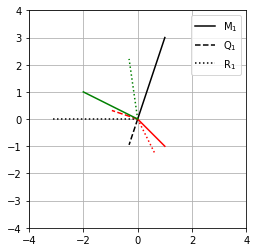

In [99]:
# plot
colorz = 'krg'

for i in range(0,np.shape(M)[1]):
    
    # plot original vector M
    plt.plot([0,M[0,i]],[0,M[1,i]],colorz[i])
    
    # plot orthogonalized vector Q
    if i<np.shape(Q)[1]:
        plt.plot([0,Q[0,i]],[0,Q[1,i]],colorz[i],linestyle='--')
    
    # plot residual vector R
    plt.plot([0,R[0,i]],[0,R[1,i]],colorz[i],linestyle=':')

    
plt.legend(['M$_1$','Q$_1$','R$_1$'])
plt.axis('square')
plt.xlim(-4,4)
plt.ylim(-4,4)
plt.grid(True)
plt.plot()

---
#  Invertion of matrix A using QR decomposition
---

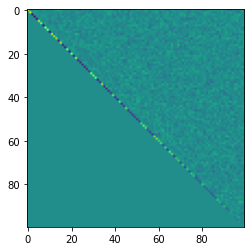

In [109]:
X = 100;
O = np.random.randn(x,x)

# inverse using inv func
Oi = np.linalg.inv(o)

# compute inverse via QR decomposition
Q,R = np.linalg.qr(o)
plt.imshow(R)
plt.show()

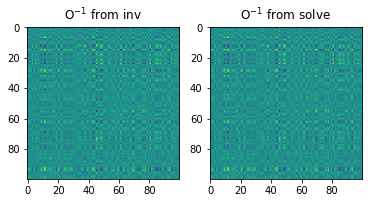

In [110]:
OiQR1 = np.linalg.inv(R)@Q.T
OiQR2 = np.linalg.solve(R,Q.T)

plt.subplot(1,2,1)
plt.imshow(OiQR1)
plt.title('O$^{-1}$ from inv')

plt.subplot(1,2,2)
plt.imshow(OiQR2)
plt.title('O$^{-1}$ from solve')

plt.show()


In [111]:
np.corrcoef((OiQR1.flatten(),OiQR2.flatten(),Oi.flatten()))

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [114]:
E = np.array([[1,2],[3,4]])
print(E.flatten())

[1 2 3 4]
